## Conways Game of Life

Snapshots saved as game_of_life_snapshots.png


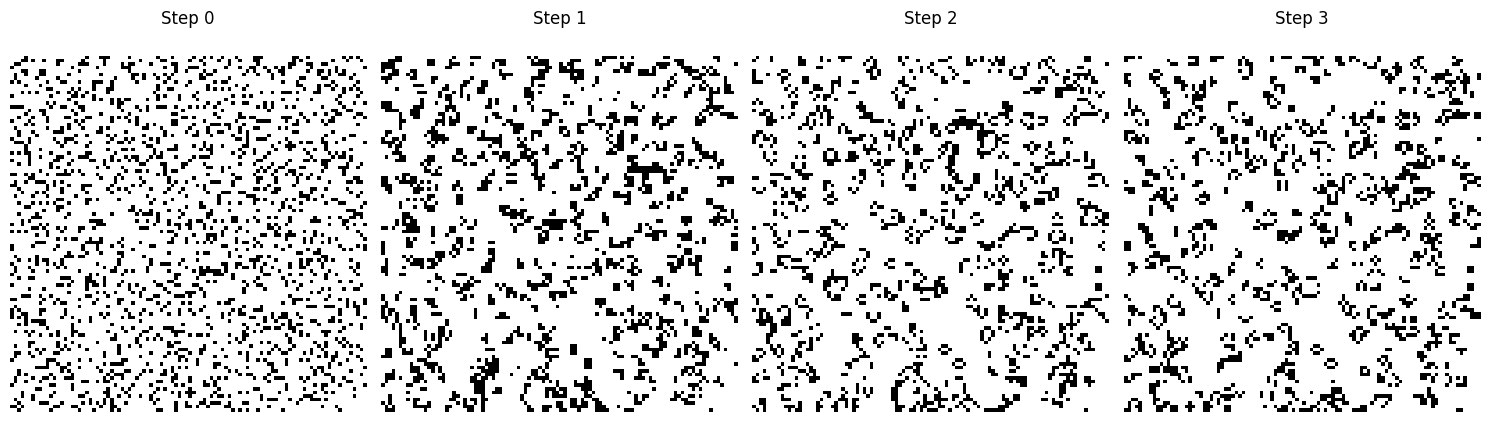

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N = 100  # Grid size
ON = 255  # Value for live cells
OFF = 0  # Value for dead cells
NUM_SNAPSHOTS = 4  # Number of snapshots to display
OUTPUT_FILENAME = "game_of_life_snapshots.png"  # File name for the PNG

# Initialize grid with random on/off values
def initialize_grid(size, on_prob=0.2):
    return np.random.choice([ON, OFF], size * size, p=[on_prob, 1 - on_prob]).reshape(size, size)

# Compute the next state of the grid
def update_grid(grid):
    new_grid = grid.copy()
    for i in range(N):
        for j in range(N):
            # Compute the sum of the 8 neighbors using toroidal boundary conditions
            neighbors = (
                grid[i, (j - 1) % N] + grid[i, (j + 1) % N] +
                grid[(i - 1) % N, j] + grid[(i + 1) % N, j] +
                grid[(i - 1) % N, (j - 1) % N] + grid[(i - 1) % N, (j + 1) % N] +
                grid[(i + 1) % N, (j - 1) % N] + grid[(i + 1) % N, (j + 1) % N]
            ) / 255

            # Apply Conway's rules
            if grid[i, j] == ON:
                if neighbors < 2 or neighbors > 3:
                    new_grid[i, j] = OFF
            else:
                if neighbors == 3:
                    new_grid[i, j] = ON
    return new_grid

# Generate multiple snapshots of the grid
def generate_snapshots(grid, num_steps):
    snapshots = [grid]
    for _ in range(num_steps - 1):
        grid = update_grid(grid)
        snapshots.append(grid)
    return snapshots

# Plot snapshots side by side and save as PNG
def plot_snapshots(snapshots, output_filename=None):
    num_snapshots = len(snapshots)
    fig, axes = plt.subplots(1, num_snapshots, figsize=(15, 5))

    for i, ax in enumerate(axes):
        ax.matshow(snapshots[i], cmap="binary")
        ax.set_title(f"Step {i}")
        ax.axis("off")

    plt.tight_layout()

    # Save the figure as PNG
    if output_filename:
        plt.savefig(output_filename, dpi=300)
        print(f"Snapshots saved as {output_filename}")

    plt.show()

# Initialize grid
grid = initialize_grid(N)

# Generate snapshots
snapshots = generate_snapshots(grid, NUM_SNAPSHOTS)

# Plot and save snapshots
plot_snapshots(snapshots, OUTPUT_FILENAME)